In [27]:
import yfinance as yf

# Choosing a stock symbol (e.g., 'AAPL' for Apple)
stock_symbol = 'AAPL'

# Downloading historical data (e.g., last 5 years of data up to 2024)
data = yf.download(stock_symbol, start='2018-01-01', end='2024-12-31')

# Displaying the first few rows of the data
print(data.head())


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2018-01-02  40.524342  40.533754  39.818588  40.030317  102223600
2018-01-03  40.517288  41.063072  40.453773  40.587864  118071600
2018-01-04  40.705482  40.808994  40.481995  40.590208   89738400
2018-01-05  41.168941  41.255983  40.710203  40.801950   94640000
2018-01-08  41.016029  41.312444  40.917221  41.016029   82271200


## Data Preprocessing

In [28]:
# Checking for missing values in the dataset
missing_values = data.isnull().sum()

# Displaying missing values count per column
print(missing_values)


Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


### Feature Selection And Engineering

In [29]:
# Adding 7-day moving average of the 'Close' price
data['7_day_MA'] = data['Close'].rolling(window=7).mean()

# Displaying the updated dataset with the new feature
print(data[['Close', '7_day_MA']].tail())


Price            Close    7_day_MA
Ticker            AAPL            
Date                              
2024-12-23  255.270004  251.464286
2024-12-24  258.200012  252.902858
2024-12-26  259.019989  254.042858
2024-12-27  255.589996  254.344286
2024-12-30  252.199997  254.937143


In [30]:
print(data.columns)


MultiIndex([(   'Close', 'AAPL'),
            (    'High', 'AAPL'),
            (     'Low', 'AAPL'),
            (    'Open', 'AAPL'),
            (  'Volume', 'AAPL'),
            ('7_day_MA',     '')],
           names=['Price', 'Ticker'])


In [31]:
# Lets Rename the columns
data.columns = ['_'.join(col).replace(' ', '').strip('_') for col in data.columns]
print(data.columns)



Index(['Close_AAPL', 'High_AAPL', 'Low_AAPL', 'Open_AAPL', 'Volume_AAPL',
       '7_day_MA'],
      dtype='object')


In [32]:
# Droping NaN values in '7_day_MA'
data = data.dropna(subset=['7_day_MA'])

# Displaying the last few rows
print(data[['Close_AAPL', '7_day_MA']].tail())


            Close_AAPL    7_day_MA
Date                              
2024-12-23  255.270004  251.464286
2024-12-24  258.200012  252.902858
2024-12-26  259.019989  254.042858
2024-12-27  255.589996  254.344286
2024-12-30  252.199997  254.937143


In [33]:
# Calculating the Exponential Moving Average (EMA) for 7 days
data['7_day_EMA'] = data['Close_AAPL'].ewm(span=7, adjust=False).mean()

# Displaying the last few rows with the new EMA column
print(data[['Close_AAPL', '7_day_MA', '7_day_EMA']].tail())


            Close_AAPL    7_day_MA   7_day_EMA
Date                                          
2024-12-23  255.270004  251.464286  251.526259
2024-12-24  258.200012  252.902858  253.194698
2024-12-26  259.019989  254.042858  254.651020
2024-12-27  255.589996  254.344286  254.885764
2024-12-30  252.199997  254.937143  254.214323


### Visualization

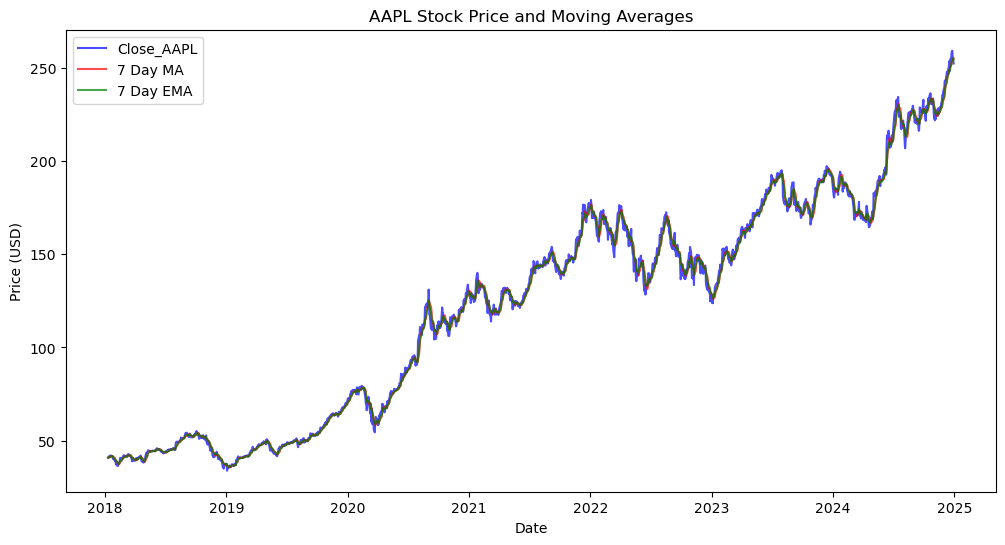

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(data['Close_AAPL'], label='Close_AAPL', color='blue', alpha=0.7)
plt.plot(data['7_day_MA'], label='7 Day MA', color='red', alpha=0.7)
plt.plot(data['7_day_EMA'], label='7 Day EMA', color='green', alpha=0.7)
plt.title('AAPL Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


## Preparing The Data

In [35]:
from sklearn.model_selection import train_test_split

# Featuring (X) and Target (y)
X = data[['7_day_MA', '7_day_EMA']]
y = data['Close_AAPL']

# Splitting data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Displaying the shape of the train and test sets
print(f"Train set: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Test set: X_test {X_test.shape}, y_test {y_test.shape}")


Train set: X_train (1403, 2), y_train (1403,)
Test set: X_test (351, 2), y_test (351,)


## Training the Model

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Displaying the performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Absolute Error (MAE): 2.0557902853693237
Mean Squared Error (MSE): 6.394401701112545
R-squared (R2): 0.9896806485326834


## Visualizing The Predictions

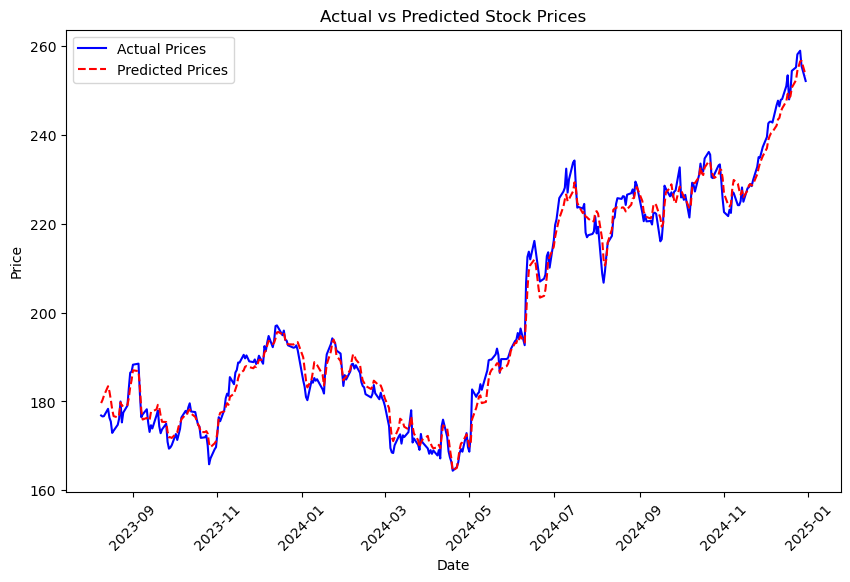

In [37]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red', linestyle='--')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()
